# Loading the data

As usual, we load the data using my favourite package `pandas`

In [1]:
import pandas as pd

ORIGINAL_DATASET = "../data/python_questions_new.csv"
data = pd.read_csv(ORIGINAL_DATASET, encoding='latin1')

# Some data type conversions
data['full_text'] = data['full_text'].astype(str)
data['CreationDate'] = pd.to_datetime(data['CreationDate'], format="%Y-%m-%dT%H:%M:%SZ")

data.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,Number of Answers,Tags,full_text,is_code_present
0,469,147.0,2008-08-02 15:11:16,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,4.0,"['python', 'osx', 'fonts', 'photoshop']",I am using the Photoshop's javascript API to f...,0
1,502,147.0,2008-08-02 17:01:58,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,3.0,"['python', 'windows', 'image', 'pdf']",I have a cross-platform (Python) application w...,0
2,535,154.0,2008-08-02 18:43:54,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,7.0,"['python', 'continuous-integration', 'extreme-...",I'm starting work on a hobby project with a py...,0
3,594,116.0,2008-08-03 01:15:08,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,3.0,"['python', 'sql', 'database', 'oracle', 'cx-or...",There are several ways to iterate over a resul...,0
4,683,199.0,2008-08-03 13:19:16,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,8.0,"['python', 'arrays', 'iteration']",I don't remember whether I was dreaming or not...,1


# Defining a new list of stopwords

Here is a list of stopwords that I found from [here](http://www.ranks.nl/stopwords). On top of this, I also add a few stop words that are applicable in our case e.g. python

In [45]:
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'contain', 'containing', 'contains', 'could', 'couldnt', 'd', 'date', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', 'done', "don't", 'down', 'downwards', 'due', 'during', 'e', 'each', 'ed', 'edu', 'effect', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'et - al', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'except', 'f', 'far', 'few', 'ff', 'fifth', 'first', 'five', 'fix', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives', 'giving', 'go', 'goes', 'gone', 'got', 'gotten', 'h', 'had', 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', 'hed', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 'hid', 'him', 'himself', 'his', 'hither', 'home', 'how', 'howbeit', 'however', 'hundred', 'i', 'id', 'ie', 'if', "i'll", 'im', 'immediate', 'immediately', 'importance', 'important', 'in', 'inc', 'indeed', 'index', 'information', 'instead', 'into', 'invention', 'inward', 'is', "isn't", 'it', 'itd', "it'll", 'its', 'itself', "i've", 'j', 'just', 'k', 'keep\tkeeps', 'kept', 'kg', 'km', 'know', 'known', 'knows', 'l', 'largely', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked', 'likely', 'line', 'little', "'ll", 'look', 'looking', 'looks', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me', 'mean', 'means', 'meantime', 'meanwhile', 'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'mug', 'must', 'my', 'myself', 'n', 'na', 'name', 'namely', 'nay', 'nd', 'near', 'nearly', 'necessarily', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted', 'nothing', 'now', 'nowhere', 'o', 'obtain', 'obtained', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'omitted', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'ord', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'owing', 'own', 'p', 'page', 'pages', 'part', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'poorly', 'possible', 'possibly', 'potentially', 'pp', 'predominantly', 'present', 'previously', 'primarily', 'probably', 'promptly', 'proud', 'provides', 'put', 'q', 'que', 'quickly', 'quite', 'qv', 'r', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'recent', 'recently', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'related', 'relatively', 'research', 'respectively', 'resulted', 'resulting', 'results', 'right', 'run', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sec', 'section', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sent', 'seven', 'several', 'shall', 'she', 'shed', "she'll", 'shes', 'should', "shouldn't", 'show', 'showed', 'shown', 'showns', 'shows', 'significant', 'significantly', 'similar', 'similarly', 'since', 'six', 'slightly', 'so', 'some', 'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specifically', 'specified', 'specify', 'specifying', 'still', 'stop', 'strongly', 'sub', 'substantially', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure\tt', 'take', 'taken', 'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that've", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'thered', 'therefore', 'therein', "there'll", 'thereof', 'therere', 'theres', 'thereto', 'thereupon', "there've", 'these', 'they', 'theyd', "they'll", 'theyre', "they've", 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 'throug', 'through', 'throughout', 'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'ts', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using', 'usually', 'v', 'value', 'various', "'ve", 'very', 'via', 'viz', 'vol', 'vols', 'vs', 'w', 'want', 'wants', 'was', 'wasnt', 'way', 'we', 'wed', 'welcome', "we'll", 'went', 'were', 'werent', "we've", 'what', 'whatever', "what'll", 'whats', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whim', 'whither', 'who', 'whod', 'whoever', 'whole', "who'll", 'whom', 'whomever', 'whos', 'whose', 'why', 'widely', 'willing', 'wish', 'with', 'within', 'without', 'wont', 'words', 'world', 'would', 'wouldnt', 'www', 'x', 'y', 'yes', 'yet', 'you', 'youd', "you'll", 'your', 'youre', 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']
python_stop_words = ['solve', 'problem', 'greatly', 'appreciated','python', 'scripts', 'script', 'code', 'py', 'doesn', 'work', 'works', 'fine', 'don', 'help']
stop_words.extend(python_stop_words)

# Converting into frozenset (sklearn requierement)
total_stop_words = frozenset(stop_words)

# Visualisation Time!

We will reuse the code from previous section but with this new list of stopwords

# Popular Phrases 2015-2016

In [3]:
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Changing the data set index to date
data = data.set_index(['CreationDate'])

In [8]:
print("Original dataset size: {}".format(data.shape))
print("First subset size: {}".format(data.loc['2008-10-15':'2009-10-15'].shape))

Original dataset size: (607282, 9)
First subset size: (9736, 9)


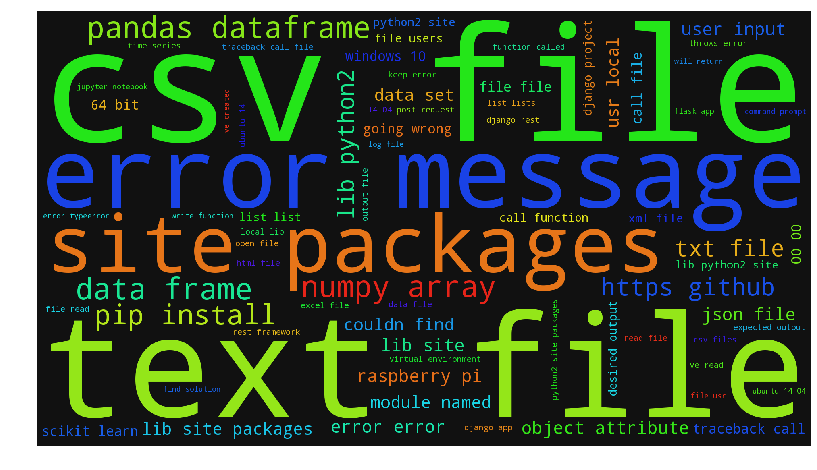

In [46]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2015-10-15':'2016-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

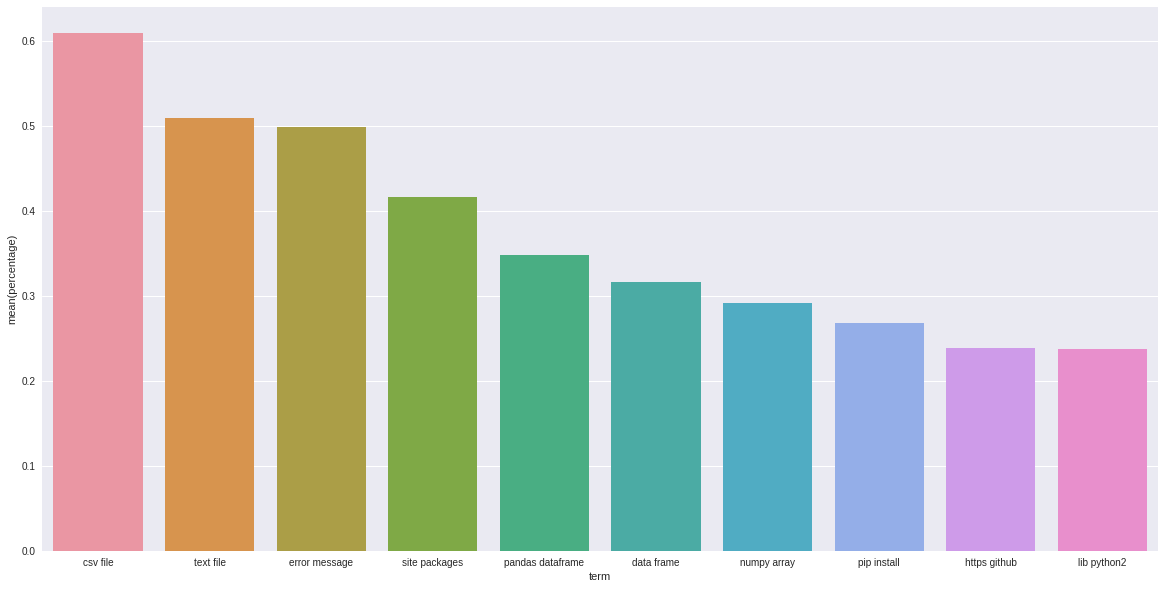

In [47]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Phrases 2014-2015

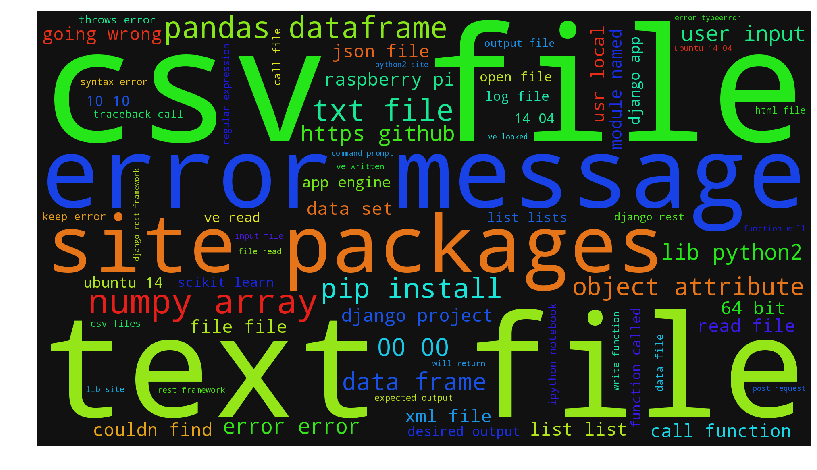

In [48]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2014-10-15':'2015-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

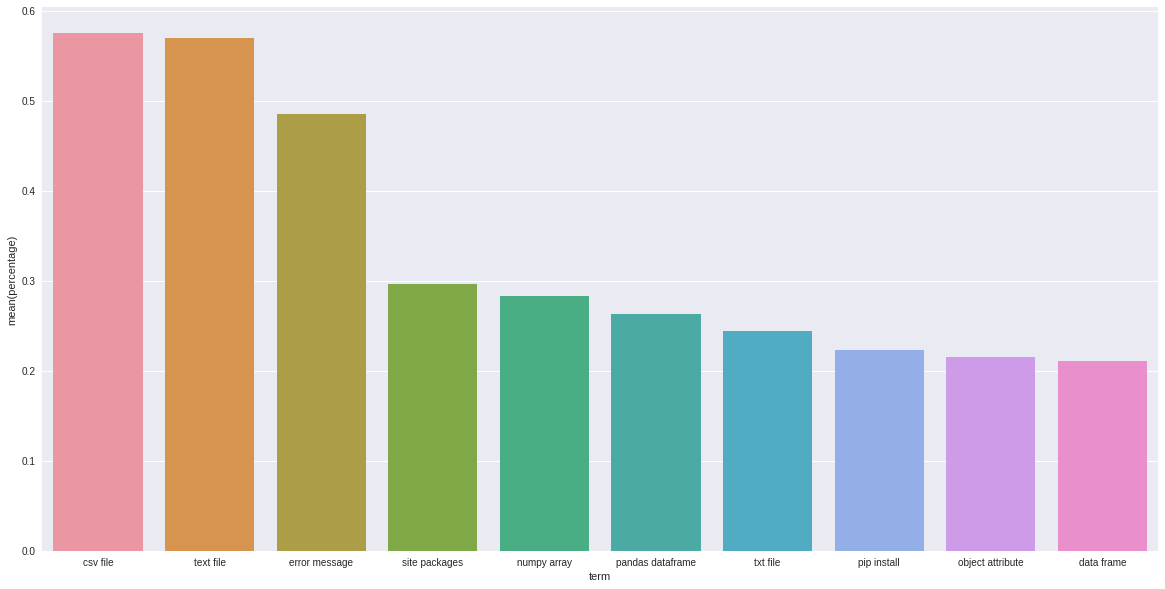

In [49]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Phrases 2013-2014

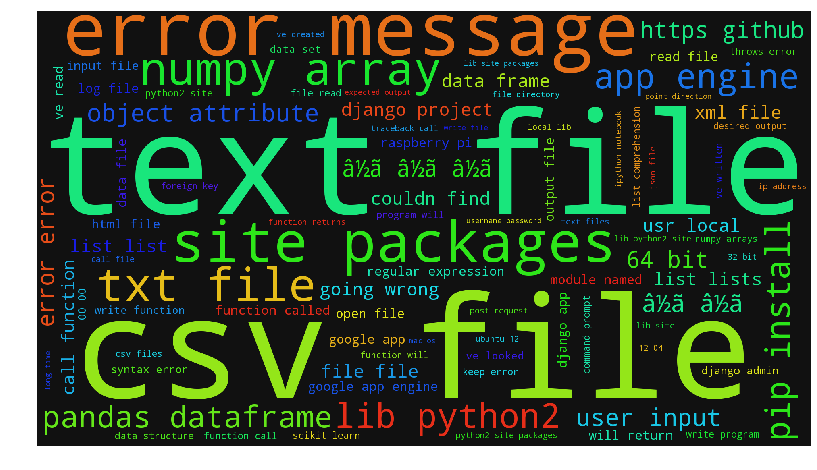

In [50]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2013-10-15':'2014-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

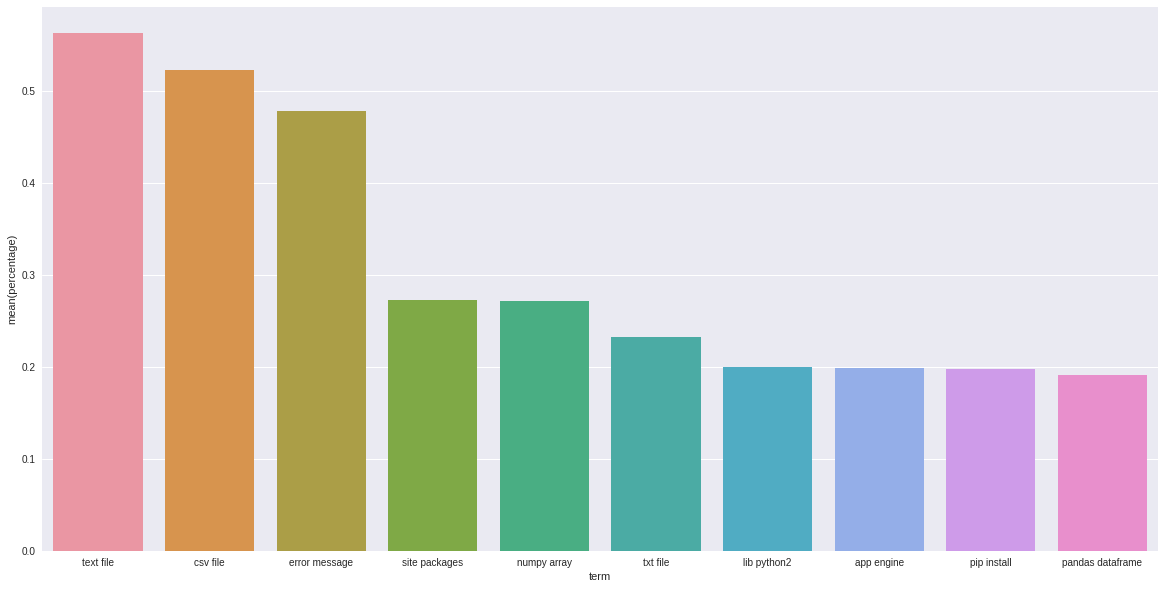

In [51]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Phrases 2012-2013

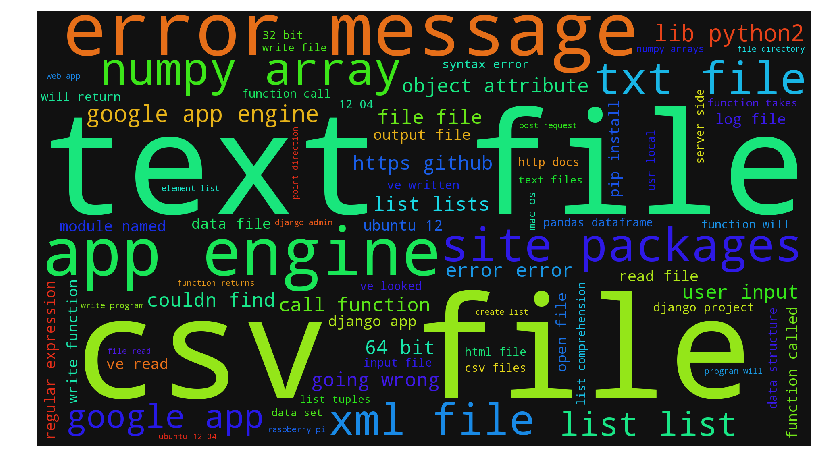

In [52]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2012-10-15':'2013-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

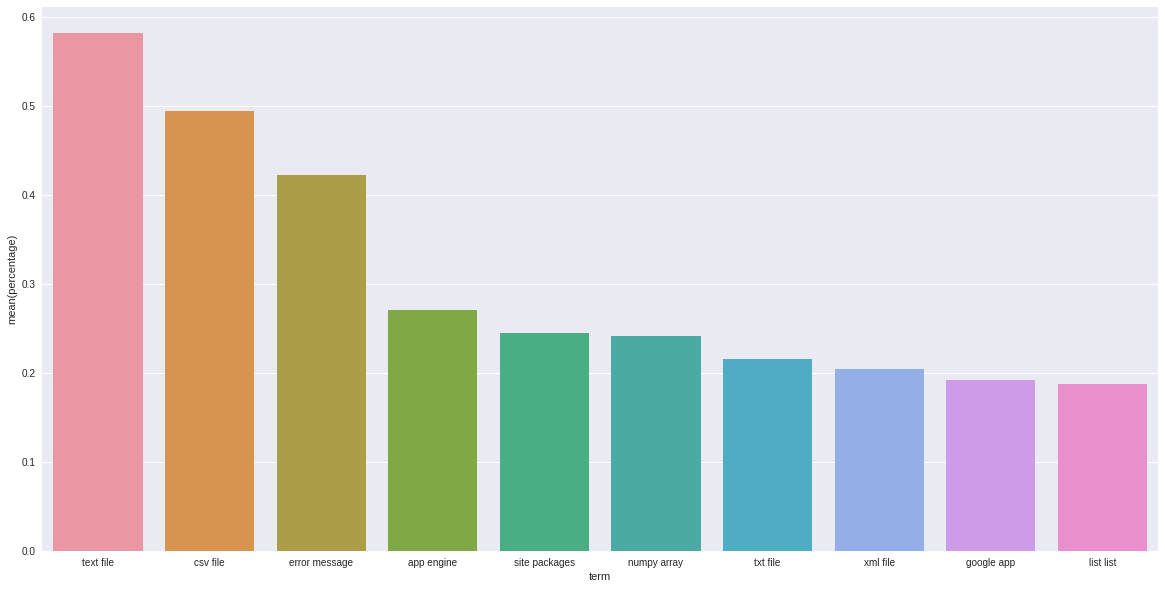

In [53]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Phrases 2011-2012

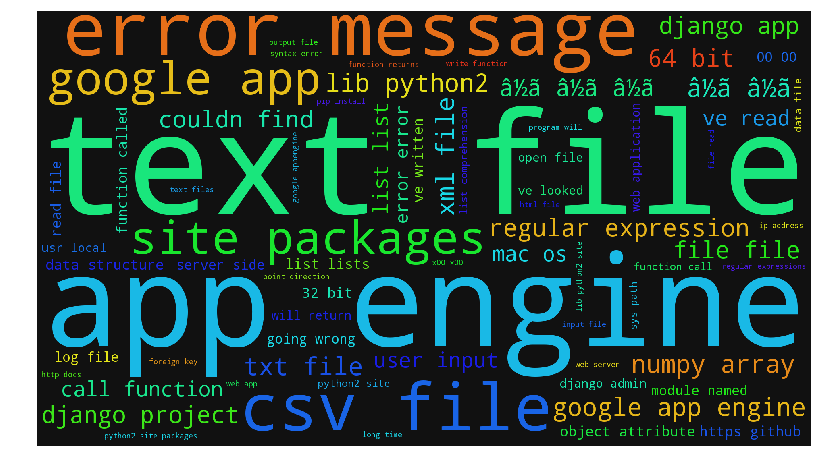

In [54]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2011-10-15':'2012-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

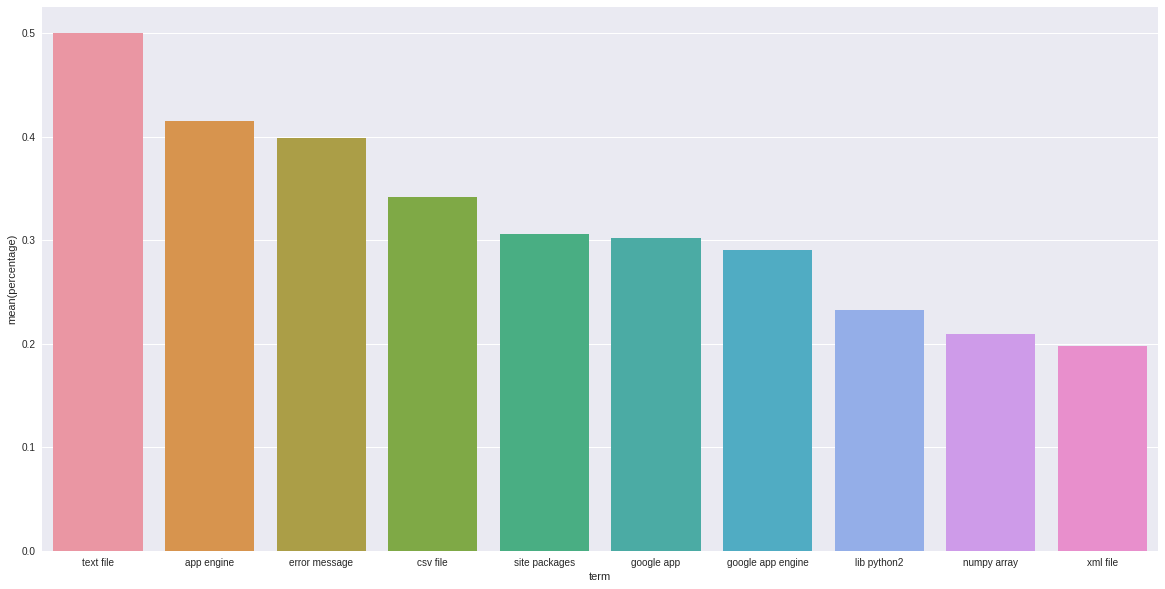

In [55]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Phrases 2010-2011

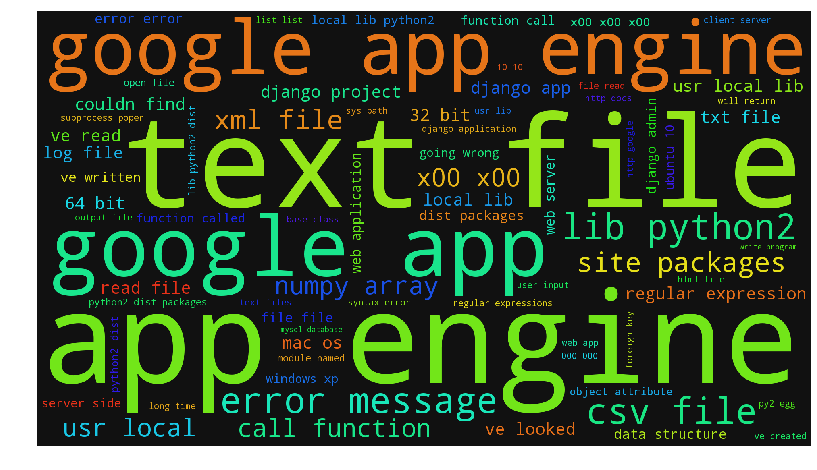

In [56]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2010-10-15':'2011-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

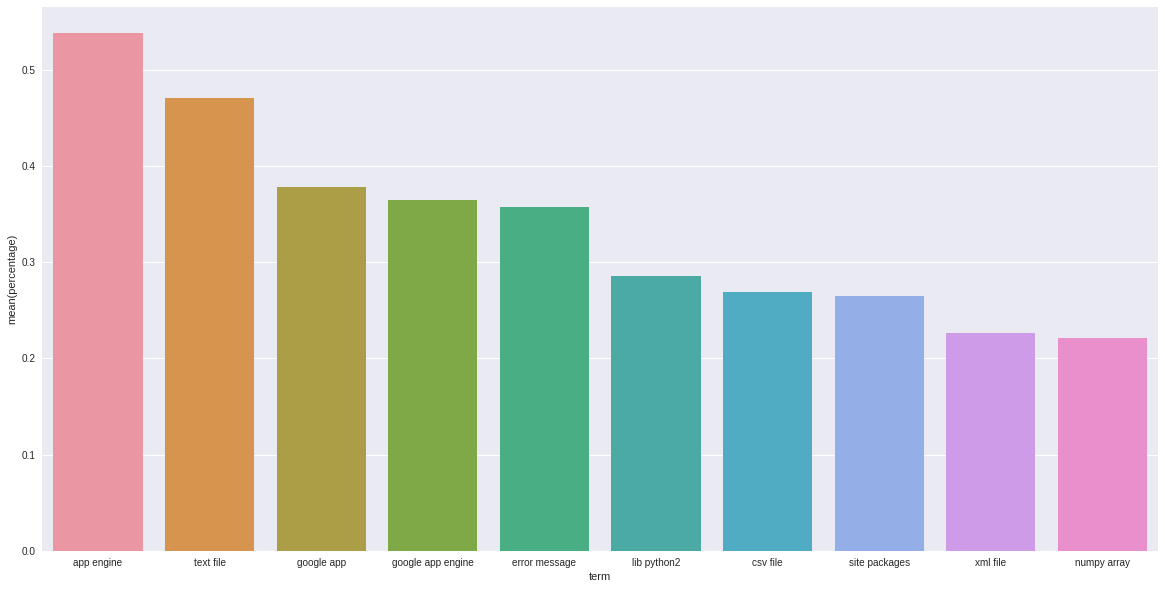

In [57]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Phrases 2009-2010

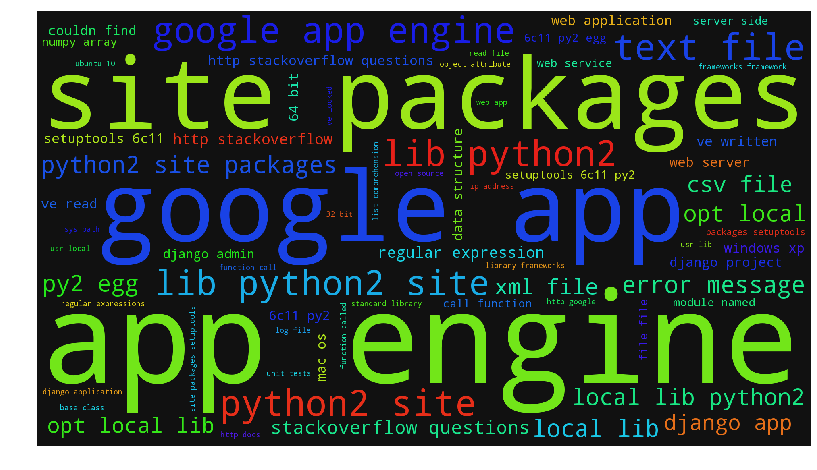

In [58]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2009-10-15':'2010-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

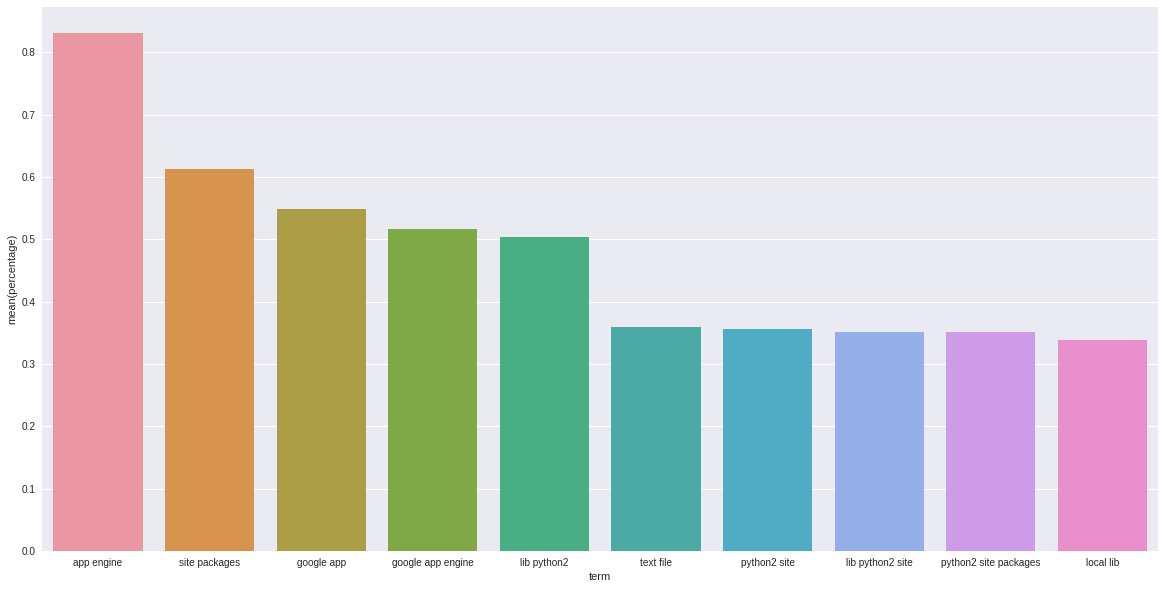

In [59]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Phrases 2008-2009

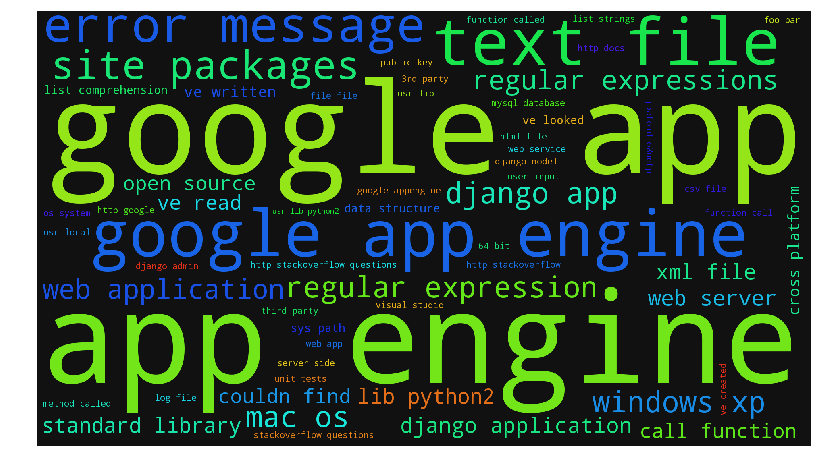

In [60]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data.loc['2008-10-15':'2009-10-15']['full_text']

text_dtm = vect.fit_transform(input_data)

word_freq_df = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df['term'], word_freq_df['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

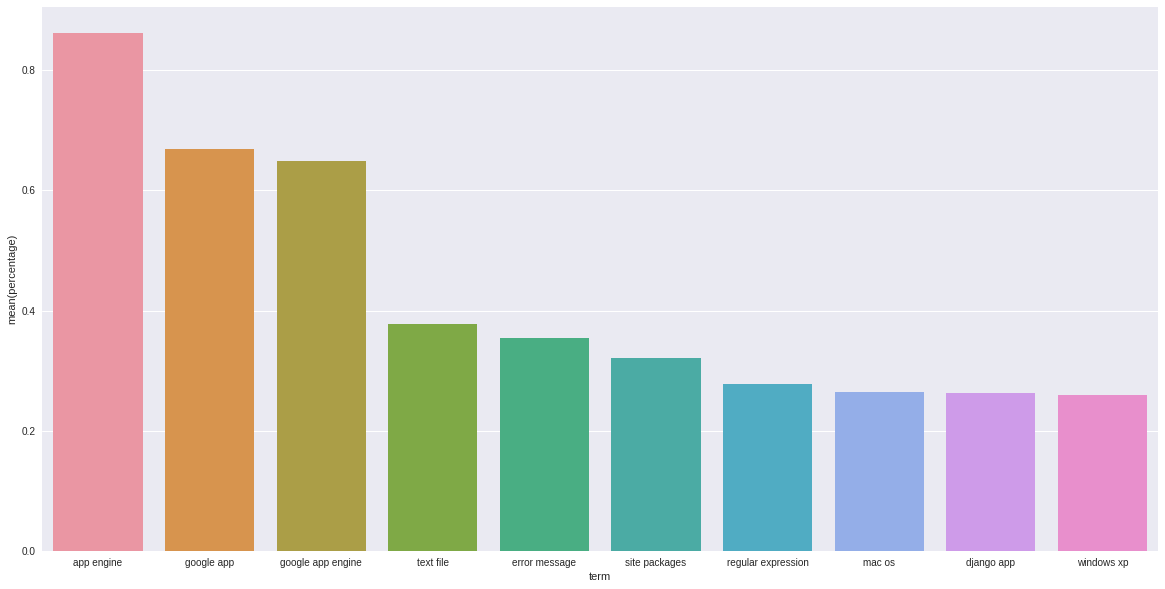

In [61]:
df = word_freq_df.sort_values('occurrences', ascending=False)
total = len(df)
df['percentage'] = df['occurrences'].apply(lambda x: (x*100)/total)
plot = sns.barplot(x="term", y="percentage", data=df[0:10])
plot.figure.set_size_inches(20,10)

Seems like there is a shift of questions asked over the year.

Prior to 2012, most of the questions asked were related to app engine which showed that Python was generally used to build app. This is further substantiated by the abundance of similar terms such as 'google app' or 'web application'

After that year, most of the questions were related to data analysis. This is shown by the domination of data analysis related terms such as 'pandas' and 'csv files'